In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 'large'

def make_plot():
    fig, axes = plt.subplots(1,2)
    return axes

In [4]:
dffull = pd.read_csv('../data/religion.csv')
dffull.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


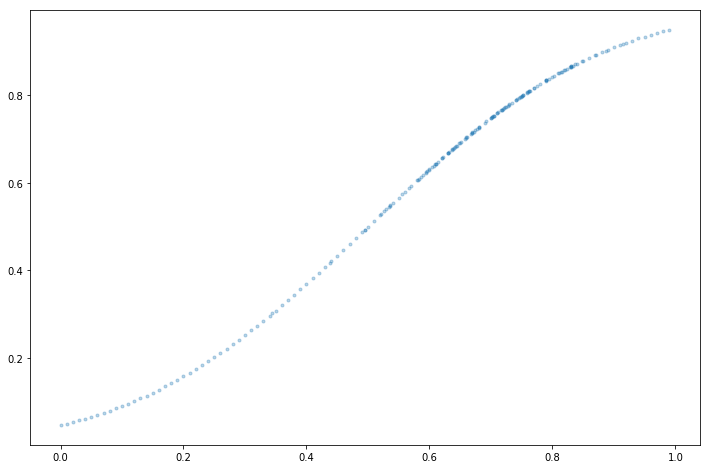

In [5]:
x = dffull.rfrac.values
f = dffull.promney.values
plt.plot(x,f,'.', alpha=0.3)

In [7]:
df = pd.read_csv('../data/noisysample.csv')
df.head()

,x,f,y,i
0,0.04,0.062597,0.036211,4
1,0.11,0.096800,0.194625,11
2,0.16,0.128537,0.072212,16
3,0.18,0.143061,0.109693,18
4,0.27,0.221640,0.413717,27


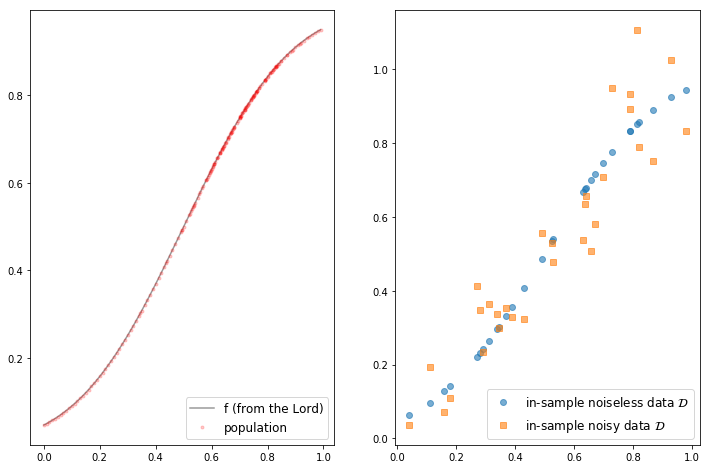

In [8]:
fig, axes = plt.subplots(1,2)
axes[0].plot(x,f, 'k-', alpha=0.4, label="f (from the Lord)");
axes[0].plot(x,f, 'r.', alpha=0.2, label="population");
axes[1].plot(df.x,df.f, 'o', alpha=0.6, label="in-sample noiseless data $\cal{D}$");
axes[1].plot(df.x,df.y, 's', alpha=0.6, label="in-sample noisy data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

# Testing and Training Sets

The process of learning has two part
- fit the model by minimizing the in-sample risk
- hope that the in-sample risk approximiates the out-of-sample risk well

Since we do not have access to the out-of-sample data, we instead do the following keep a separate data set called test-set and compute the risk on this dataset, and consider this as out-of-sample risk.

Some terminology:

1. The **training set**, which is part of the data we use to fit a model
2. The **testing set**, a smaller part of the data set which we use to see how good our fit was.

The splitting is done by randomly sample out data set. Typically we resever 80% of data set for the training set. We can use `train_test_split` function from `sklearn.cross_validation`.

![train/test](gfx/train-test.png)

Thus we are **using the training set as our in-sample set, and test set as a proxy for out-of-sample.**


In [15]:
from sklearn.cross_validation import train_test_split
datasize = df.shape[0]

# split dataset
itrain, itest = train_test_split(range(30), train_size=24, test_size = 6)
xtrain = df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values
xtest = df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

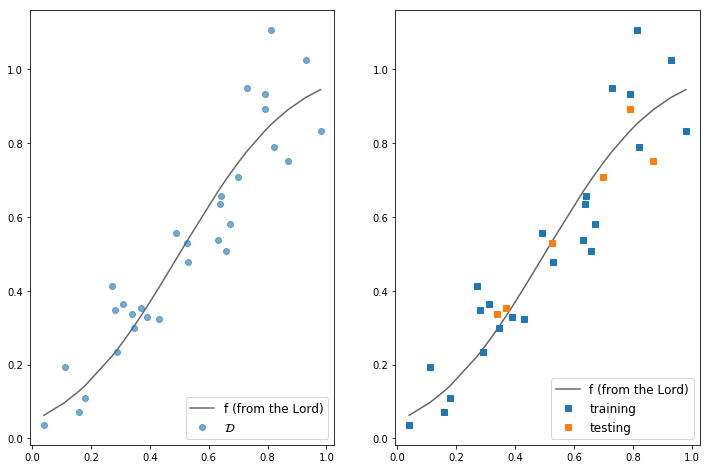

In [20]:
axes = make_plot()
axes[0].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(df.x,df.y, 'o',alpha=0.6, label="$\cal{D}$");
axes[1].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower right")

# Data Transformations

Some times we want to transform a features into a set of features. For example $$x \rightarrow 1, x, x^2, \dots, x^d.$$

For a set of data, the schema of this transformation will be

![feature transformation](gfx/sklearntrans.jpg)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(3).fit_transform([[1], [2], [3]])

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

We are using `[[1], [2], [3]]` instead of `[1,2,3]` because scikit-learn expect a matrix [n_samples, n_features]

In [25]:
data = np.array([1,2,3]).reshape(-1,1)
data.shape

(3, 1)

In [26]:
data

array([[1],
       [2],
       [3]])

In [29]:
xtrain

array([0.7290476 , 0.53      , 0.98      , 0.93      , 0.81318007,
       0.43      , 0.6717333 , 0.04      , 0.39      , 0.29      ,
       0.11      , 0.64      , 0.63793494, 0.49      , 0.27      ,
       0.28      , 0.65776511, 0.18      , 0.16      , 0.34471571,
       0.63068916, 0.78965524, 0.31      , 0.82      ])

In [31]:
xtrain.reshape(-1,1)

array([[0.7290476 ],
       [0.53      ],
       [0.98      ],
       [0.93      ],
       [0.81318007],
       [0.43      ],
       [0.6717333 ],
       [0.04      ],
       [0.39      ],
       [0.29      ],
       [0.11      ],
       [0.64      ],
       [0.63793494],
       [0.49      ],
       [0.27      ],
       [0.28      ],
       [0.65776511],
       [0.18      ],
       [0.16      ],
       [0.34471571],
       [0.63068916],
       [0.78965524],
       [0.31      ],
       [0.82      ]])

In [32]:
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1,1))

array([[1.        , 0.7290476 , 0.53151041],
       [1.        , 0.53      , 0.2809    ],
       [1.        , 0.98      , 0.9604    ],
       [1.        , 0.93      , 0.8649    ],
       [1.        , 0.81318007, 0.66126183],
       [1.        , 0.43      , 0.1849    ],
       [1.        , 0.6717333 , 0.45122563],
       [1.        , 0.04      , 0.0016    ],
       [1.        , 0.39      , 0.1521    ],
       [1.        , 0.29      , 0.0841    ],
       [1.        , 0.11      , 0.0121    ],
       [1.        , 0.64      , 0.4096    ],
       [1.        , 0.63793494, 0.40696098],
       [1.        , 0.49      , 0.2401    ],
       [1.        , 0.27      , 0.0729    ],
       [1.        , 0.28      , 0.0784    ],
       [1.        , 0.65776511, 0.43265494],
       [1.        , 0.18      , 0.0324    ],
       [1.        , 0.16      , 0.0256    ],
       [1.        , 0.34471571, 0.11882892],
       [1.        , 0.63068916, 0.39776882],
       [1.        , 0.78965524, 0.62355539],
       [1.

# Fitting in sklearn

`scikit-learn` learning algorithms are organized as `estimator` objects. and you fit data using the following syntax

`estimator.fit(Xtrain,ytrain)`

The training set and test set must be organized as follows.

![data organization](gfx/sklearn2.jpg)

Once you fit the estimator using Xtrain, we peform prediction on Xtest
`estimator.predict(Xtest)`

Let's put our knowledge in work. We create a set of data set,each for a degree.

In [35]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

# How do training and testing error change with complexity?

We use `LinearRegression` and `mean_squared_error` to compare between models and select the best model.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
degrees = range(21)
error_train = np.empty(len(degrees))
error_test = np.empty(len(degrees))

In [38]:
traintestlists = make_features(xtrain, xtest, degrees)

## Estimating the out-of-sample error

Fitting a polynomial of degree 3 on train data

In [45]:
est3 = LinearRegression()
est3.fit(traintestlists[3]['train'], ytrain)
pred_on_train3 = est3.predict(traintestlists[3]['train'])
pred_on_test3 = est3.predict(traintestlists[3]['test'])

In [49]:
print("errtrain",mean_squared_error(ytrain, pred_on_train3))
print("errtest",mean_squared_error(ytest, pred_on_test3))

errtrain 0.011851801236882406
errtest 0.0049079628619738665


Fitting a polynomial of degree 19 on train data

In [51]:
est19 = LinearRegression()
est19.fit(traintestlists[19]['train'], ytrain)
pred_on_train19 = est19.predict(traintestlists[19]['train'])
pred_on_test19 = est19.predict(traintestlists[19]['test'])

In [52]:
print("errtrain",mean_squared_error(ytrain, pred_on_train19))
print("errtest",mean_squared_error(ytest, pred_on_test19))

errtrain 0.0011394195416014853
errtest 182.84394267193508


We can see that the errtest is very large for the polynomial of degree 19. This is **overfitting**

In [53]:
for d in degrees:
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    est = LinearRegression()
    est.fit(Xtrain, ytrain)
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    error_train[d] = mean_squared_error(prediction_on_training, ytrain)
    error_test[d] = mean_squared_error(prediction_on_test, ytest)

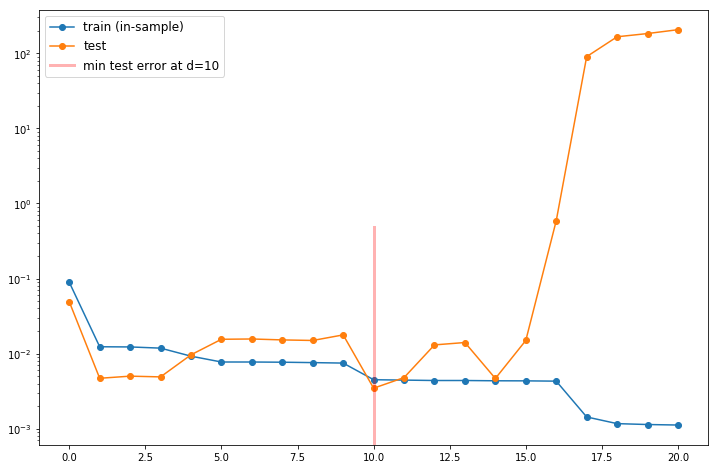

In [62]:
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', lw=3,label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.yscale('log')
plt.legend(loc=2)

The idea is to pick a model that minimize the error on test set as illustrated in 

![model validation](gfx/complexity-error-plot.png)

# Is this a test set?

How do put a error bar on our estimate? The answer is we should perform random sampling.

Another note is that, we visually fit the best value of degree d using the error plot. We have contaminated our test set beacuse we use it in the learning process (learning which degreee is the best). Hence it is not a test set anymore. The solution is to have another data set callled validation set.

# Learning from finite sized samples

This is from statistical learning theory. The writing is not clear. Need to be rewritten.

It is written in Chapter 6 Murphy

    We can use Hoeffding's inequality to understand how our sample quantities differ from the population ones.

    Hoeffding's inequality applies to the situation where we have a population of binary random variables with fraction $\mu$ of things of one type (heads vs tails, red vs green). We do not have acces to this population, but rather, to a sample drawn with replacement from this population, where the fraction is $\nu$

    Then (where the probability can be thought of as amongs many samples):
    $$P(|\nu - \mu| > \epsilon) \leq 2e^{-2\epsilon^2N} $$

    In the context of learning a hypothesis h, if we identify heads(1) with $h(x_i) \neq f(x_i)$ at sample $x_i$, and tails(0) otherwise. Then $\mu$ is the error rate in the population, while $\nu$ is the same for the sample. It can be shown that the same hold for risk values:

    $$P(R_{in}(h) - R_{out}(h) > \epsilon) \leq 2e^{-2\epsilon^2N}$$